In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20276\752246109.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\automobile_data.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
l = list(df.columns)
d = {}
for i in l:
    v = (df[i] == '?').sum()
    d[i] = v
print(d)

{'symboling': 0, 'normalized-losses': 41, 'make': 0, 'fuel-type': 0, 'aspiration': 0, 'num-of-doors': 2, 'body-style': 0, 'drive-wheels': 0, 'engine-location': 0, 'wheel-base': 0, 'length': 0, 'width': 0, 'height': 0, 'curb-weight': 0, 'engine-type': 0, 'num-of-cylinders': 0, 'engine-size': 0, 'fuel-system': 0, 'bore': 4, 'stroke': 4, 'compression-ratio': 0, 'horsepower': 2, 'peak-rpm': 2, 'city-mpg': 0, 'highway-mpg': 0, 'price': 4}


In [6]:
def data_door(data):
    if (data =='two'):
        return 2
    elif (data == 'four'):
        return 4
    else: return np.nan
df['num-of-doors'] = df['num-of-doors'].apply(data_door)

In [7]:
l = list(df['num-of-cylinders'].unique())
d = {'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8}
def data_cylinder(data):
            if data in d.keys():
                return d[data]
            else: 
                return np.nan
                
df['num-of-cylinders'] = df['num-of-cylinders'].apply(data_cylinder)

l = list(df.columns)
d = {}
for i in l:
    v = (df[i] == '?').sum()
    d[i] = v
print(d)

In [8]:
import numpy as np

# Replace '?' with NaN in the specified columns
cols_to_replace = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm','price']
df[cols_to_replace] = df[cols_to_replace].replace('?', np.nan)

# Convert the specified columns to float type
df[cols_to_replace] = df[cols_to_replace].astype(np.float64)

# # Now, you can safely cast these columns to integers
# df[cols_to_replace] = df[cols_to_replace].astype(np.int16)


In [9]:
l = list(df.columns)
d = {}
for i in l:
    v = (df[i] == '?').sum()
    d[i] = v
print(d)

{'symboling': 0, 'normalized-losses': 0, 'make': 0, 'fuel-type': 0, 'aspiration': 0, 'num-of-doors': 0, 'body-style': 0, 'drive-wheels': 0, 'engine-location': 0, 'wheel-base': 0, 'length': 0, 'width': 0, 'height': 0, 'curb-weight': 0, 'engine-type': 0, 'num-of-cylinders': 0, 'engine-size': 0, 'fuel-system': 0, 'bore': 0, 'stroke': 0, 'compression-ratio': 0, 'horsepower': 0, 'peak-rpm': 0, 'city-mpg': 0, 'highway-mpg': 0, 'price': 0}


In [10]:
# df.dropna(axis = 0,inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

#data cleaning 

    - replace ? to nan values
    - convert object columns to numeric
    - check outlier is valid or not
    - missing nan values in all our data

In [12]:
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,203.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,3.123153,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,0.994841,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
c = df.corr(numeric_only = True)
l=list(c.columns)
c

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.664550,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.407134,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.175380,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
num-of-doors,-0.664550,-0.407134,1.000000,0.445696,0.393593,0.202072,0.547651,0.195683,-0.016530,0.017519,0.114501,-0.010697,0.165799,-0.124963,-0.242485,-0.020812,-0.044507,0.046532
wheel-base,-0.531954,-0.074362,0.445696,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.393593,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.202072,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.547651,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.119893,0.195683,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
num-of-cylinders,-0.113129,0.175380,-0.016530,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.243553,0.008578,-0.020002,0.691633,-0.124434,-0.445837,-0.466666,0.708645
engine-size,-0.105790,0.167365,0.017519,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335


In [14]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<Axes: >

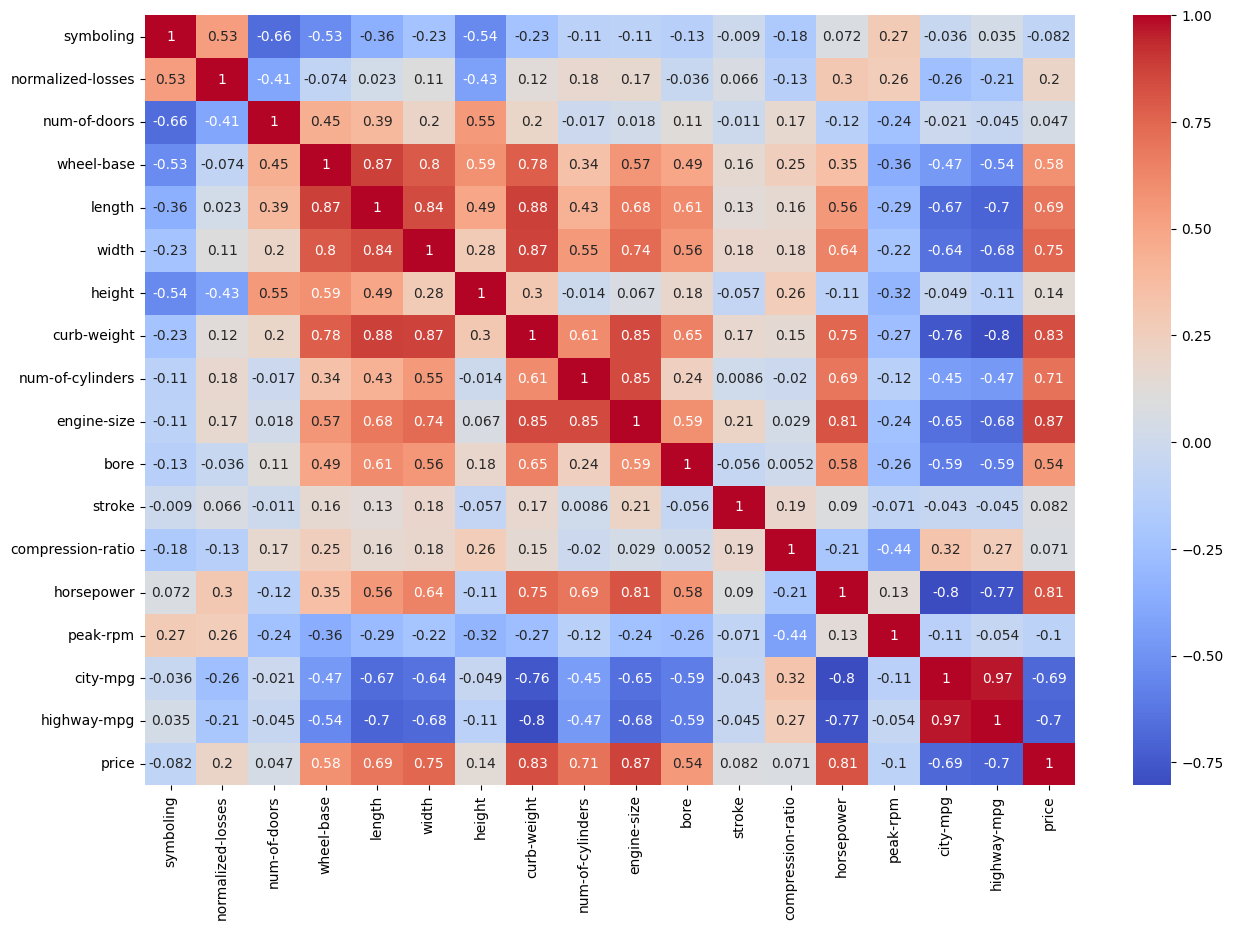

In [15]:
plt.figure(figsize = (15,10))
sns.heatmap(c,cmap = 'coolwarm',annot = True)

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='price'>

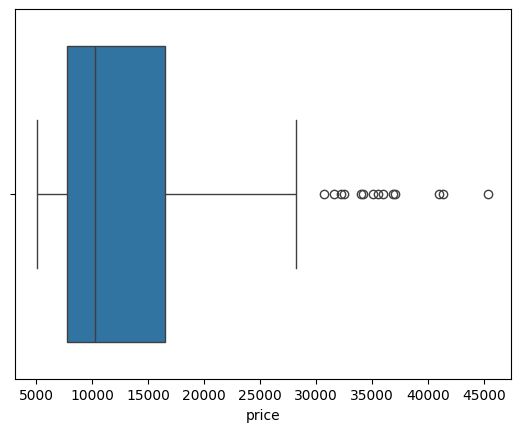

In [16]:
sns.boxplot(x = df['price'])

In [17]:
d = list(df.isna().sum().values)
h = 0
for i in d:h+=i
print(h/df.shape[0]*100)

28.780487804878046


##univariate
    -go

In [18]:
df[['normalized-losses']].describe()

,normalized-losses
count,164.000000
mean,122.000000
std,35.442168
min,65.000000
25%,94.000000
50%,115.000000
75%,150.000000
max,256.000000


<Axes: ylabel='Frequency'>

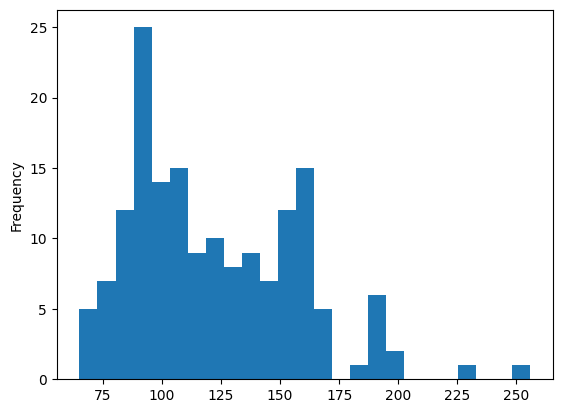

In [19]:
df['normalized-losses'].plot(kind = 'hist',bins = 25)

<Axes: ylabel='Density'>

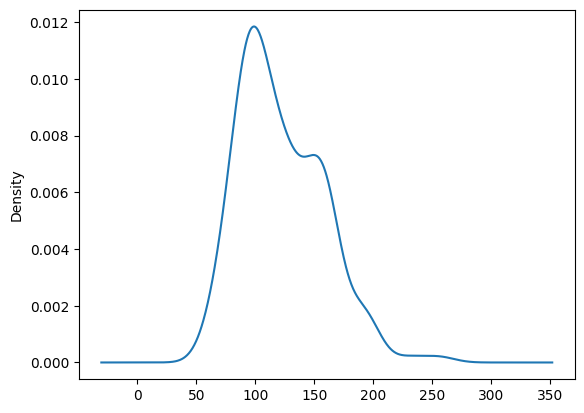

In [20]:
df['normalized-losses'].plot(kind = 'kde')

<Axes: >

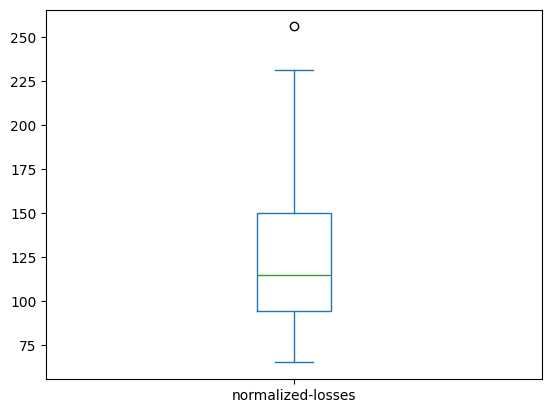

In [21]:
df['normalized-losses'].plot(kind = 'box')

In [22]:
df['normalized-losses'].skew()

0.7659764175950632

In [23]:
d = df.sort_values(by = 'normalized-losses')

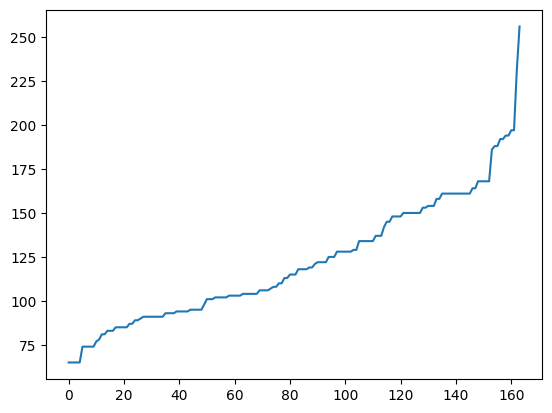

In [24]:
plt.plot(range(len(d)),'normalized-losses',data = d)

In [25]:
df['normalized-losses'].interpolate(method = 'quadratic' ,limit_direction = 'both',inplace = True)

In [26]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,161.597066,audi,gas,std,2.0,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.000000,audi,gas,std,4.0,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,154.417606,audi,gas,std,4.0,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.000000,audi,gas,turbo,4.0,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,175.897300,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [27]:
df.isnull().sum()

symboling            0
normalized-losses    3
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [28]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0],inplace = True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_20276\340940946.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].fillna(df['num-of-doors'].mode()[0],inplace = True)


In [29]:
df['bore'].fillna(df['bore'].mean(),inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20276\2745195061.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bore'].fillna(df['bore'].mean(),inplace = True)


In [30]:
df['stroke'].skew()

-0.6831221940577341

In [31]:
df[['stroke']]

,stroke
0,2.68
1,2.68
2,3.47
3,3.40
4,3.40
...,...
200,3.15
201,3.15
202,2.87
203,3.40


In [32]:
df['stroke'].median()

3.29

<Axes: ylabel='Density'>

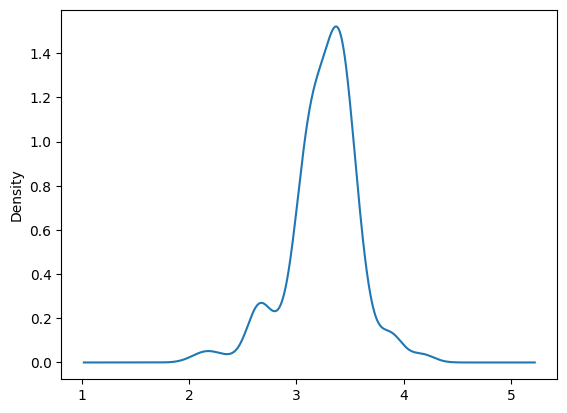

In [33]:
df['stroke'].plot(kind = 'kde')

<Axes: ylabel='Frequency'>

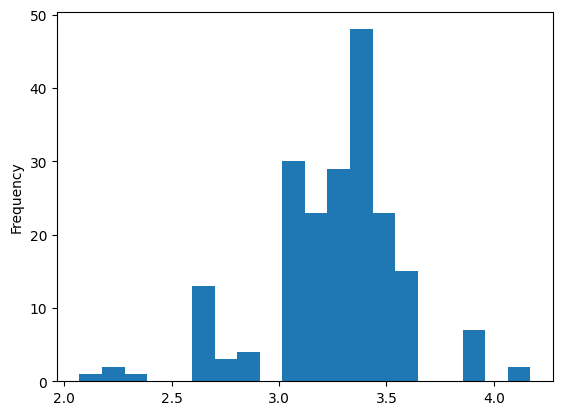

In [34]:
df['stroke'].plot(kind = 'hist',bins = 20)

In [35]:
df['stroke'].fillna(df['stroke'].median(),inplace = True)

### horsepower

In [36]:
df[['horsepower']]

,horsepower
0,111.0
1,111.0
2,154.0
3,102.0
4,115.0
...,...
200,114.0
201,160.0
202,134.0
203,106.0


<Axes: ylabel='Frequency'>

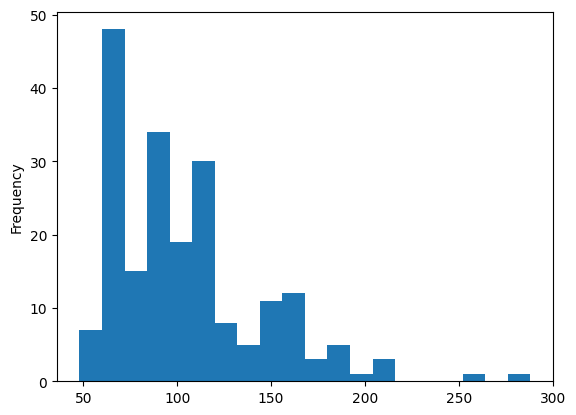

In [37]:
df['horsepower'].plot(kind = 'hist',bins = 20)

<Axes: ylabel='Density'>

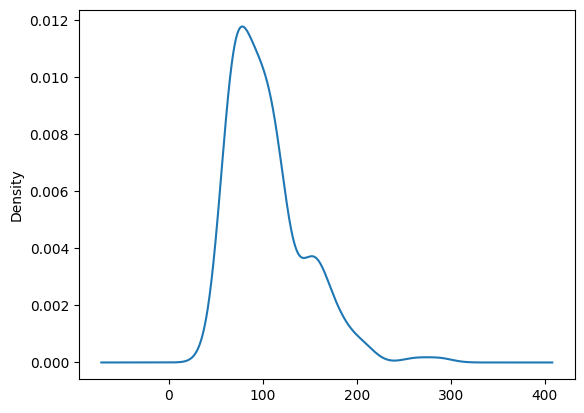

In [38]:
df['horsepower'].plot(kind = 'kde')

In [39]:
df['horsepower'].skew()

1.3910294937929355

<Axes: >

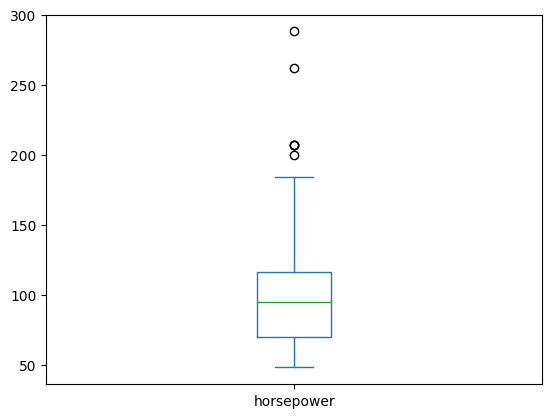

In [40]:
df['horsepower'].plot(kind = 'box')

In [41]:
d = df[df['horsepower'] > 180]
d[['horsepower']]

,horsepower
15,182.0
16,182.0
17,182.0
49,262.0
73,184.0
74,184.0
105,200.0
126,207.0
127,207.0
128,207.0


In [42]:
df[['horsepower']].describe()

,horsepower
count,203.000000
mean,104.256158
std,39.714369
min,48.000000
25%,70.000000
50%,95.000000
75%,116.000000
max,288.000000


In [43]:
df['horsepower'].fillna(df['horsepower'].median(),inplace = True)

### peak-rpm

In [44]:
df[['peak-rpm']]

,peak-rpm
0,5000.0
1,5000.0
2,5000.0
3,5500.0
4,5500.0
...,...
200,5400.0
201,5300.0
202,5500.0
203,4800.0


<Axes: ylabel='Frequency'>

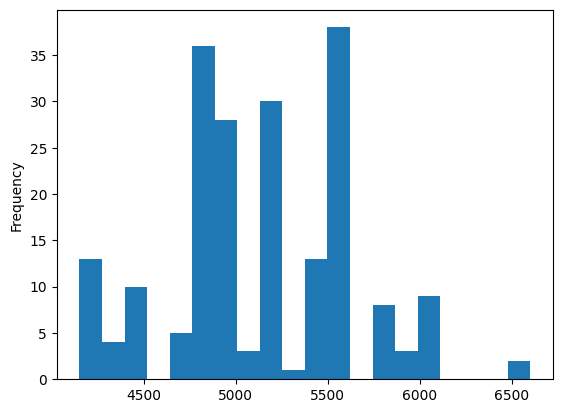

In [45]:
df['peak-rpm'].plot(kind = 'hist',bins = 20)

<Axes: ylabel='Density'>

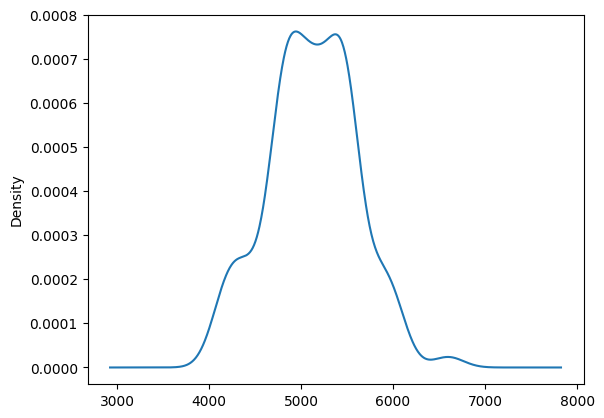

In [46]:
df['peak-rpm'].plot(kind = 'kde')

In [47]:
df['peak-rpm'].skew()

0.07323669149378209

<Axes: >

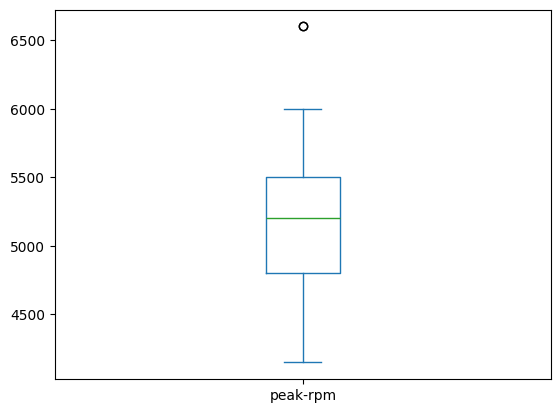

In [48]:
df['peak-rpm'].plot(kind = 'box')

In [49]:
df[df['peak-rpm'] > 6100]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
165,1,168.0,toyota,gas,std,2.0,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
166,1,168.0,toyota,gas,std,2.0,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0


In [50]:
df['peak-rpm'].fillna(df['peak-rpm'].mean(),inplace = True)

In [51]:
df['peak-rpm'].mean()

5125.369458128079

In [52]:
df['peak-rpm'].mode()

0    5500.0
Name: peak-rpm, dtype: float64

In [53]:
df['peak-rpm'].median()

5200.0

In [54]:
df['peak-rpm'].describe()

count     205.000000
mean     5125.369458
std       476.979093
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

###price

In [55]:
df[['price']]

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [56]:
df['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

<Axes: ylabel='Frequency'>

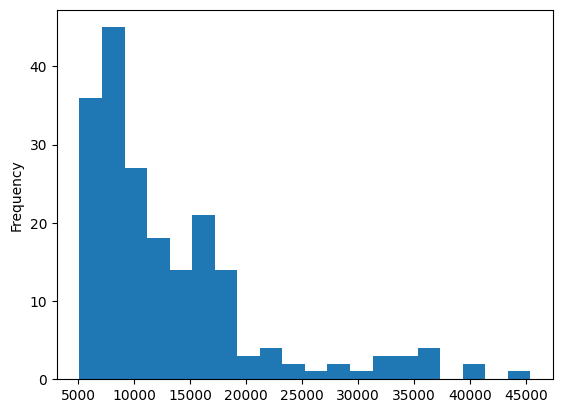

In [57]:
df['price'].plot(kind = 'hist',bins = 20)

<Axes: ylabel='Density'>

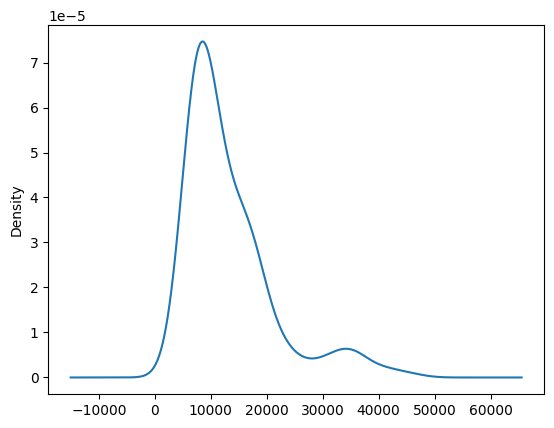

In [58]:
df['price'].plot(kind = 'kde')

In [59]:
df['price'].skew()

1.8096753390980749

<Axes: >

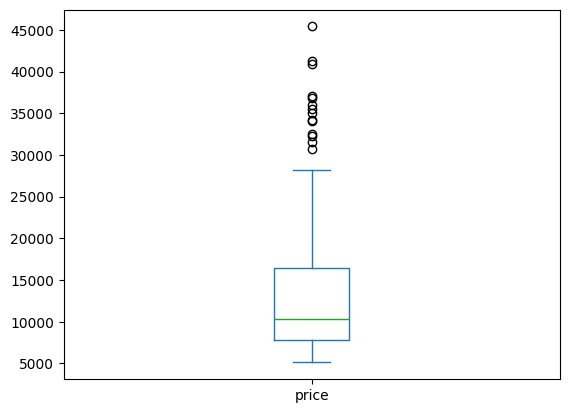

In [60]:
df['price'].plot(kind = 'box')

In [61]:
df[df['price'] > 31000].sort_values(by  = 'price')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
70,-1,93.000000,mercedes-benz,diesel,turbo,4.0,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
47,0,145.000000,jaguar,gas,std,4.0,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0
126,3,245.748829,porsche,gas,std,2.0,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.0
127,3,280.178108,porsche,gas,std,2.0,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0
71,-1,114.218379,mercedes-benz,gas,std,4.0,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
72,3,142.000000,mercedes-benz,gas,std,2.0,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
48,0,131.601384,jaguar,gas,std,4.0,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
49,0,113.304216,jaguar,gas,std,2.0,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
17,0,141.223828,bmw,gas,std,4.0,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
128,3,289.287838,porsche,gas,std,2.0,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0


In [62]:
print(df['price'].median())
print(df['price'].mean())

10295.0
13207.129353233831


In [63]:
df['price'].fillna(df['price'].median(),inplace = True)

### normalized-losses

In [64]:
df[(df['fuel-type'] == 'gas') & (df['aspiration'] == 'std')]['normalized-losses'].mean()

132.04085551725632

In [65]:
df['normalized-losses'].head(3).fillna(132.0, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20276\2527225652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].head(3).fillna(132.0, inplace=True)


In [66]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Now data is clean ready for perfoming EDA

b. Which company manufactured the most expensive car and at what price? /

***********conclusion**********************

    - mercendes-benz is manufactured most expensive car

    - And Car price is '45400.0'

In [67]:
df[(df['price'] == df['price'].max() )]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,1,162.557774,mercedes-benz,gas,std,2.0,hardtop,rwd,front,112.0,...,304,mpfi,3.8,3.35,8.0,184.0,4500.0,14,16,45400.0


c. Calculate the maximum horsepower for each company.
                                   
    ***********conclusion**********************
        - i have find all company maximum  horsepower but mainly two company give the higest horsepower in car ['porsche','jaguar']
        - chevrolet and isuzu.these company are maximum horsepower is very low (70,90)
        - most mostly company are manufacture the horsepower around (140 To 170)

In [68]:
d_max = df.groupby(['make'])['horsepower'].max().reset_index()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20276\1280863208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'make',y = 'horsepower',data = d_max,palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20276\1280863208.py:2: UserWarning: 
The palette list has fewer values (3) than needed (22) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x = 'make',y = 'horsepower',data = d_max,palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lenovo\AppData\Local\Programs\Python\P

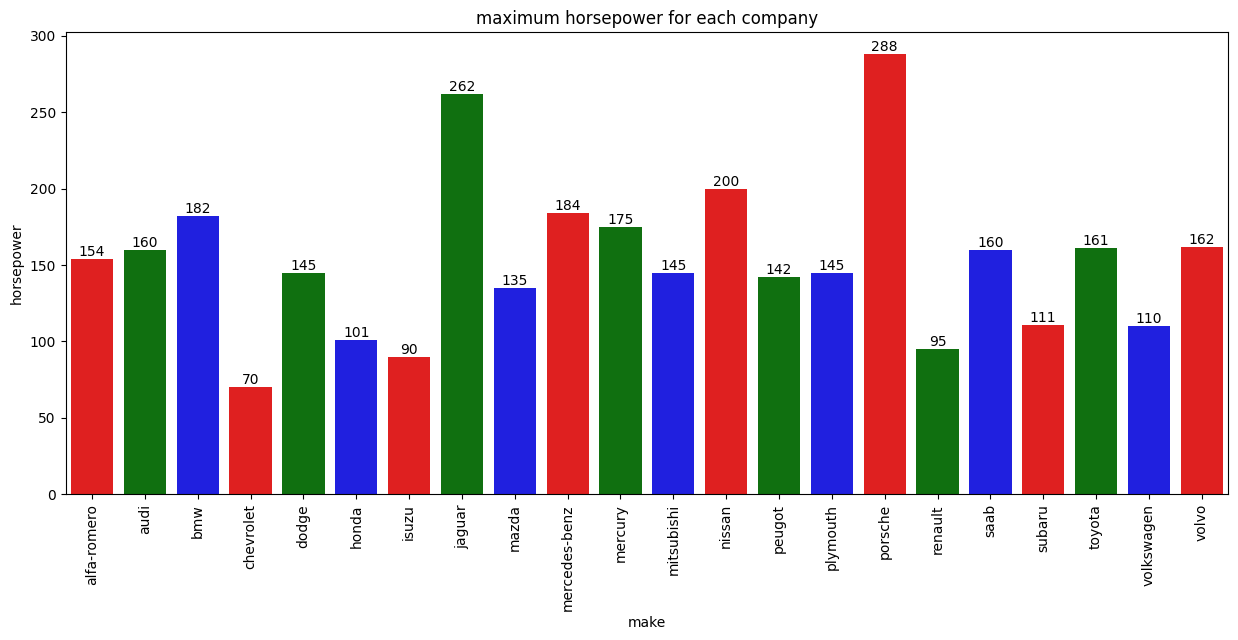

In [69]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x = 'make',y = 'horsepower',data = d_max,palette = list('rgb'))
for i in range(len(d_max.horsepower)):
    ax.bar_label(ax.containers[i])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('maximum horsepower for each company')
plt.show()

What is the total count of cars manufactured by each company? 

    *******************conclusion****************************
        - According to this dataset.top 3 highest manufacture company like (1: Toyota,2:nissan,3:mazad)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20276\4127974804.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=c.index, y=c.values,palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20276\4127974804.py:4: UserWarning: 
The palette list has fewer values (3) than needed (22) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=c.index, y=c.values,palette = list('rgb'))
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_ba

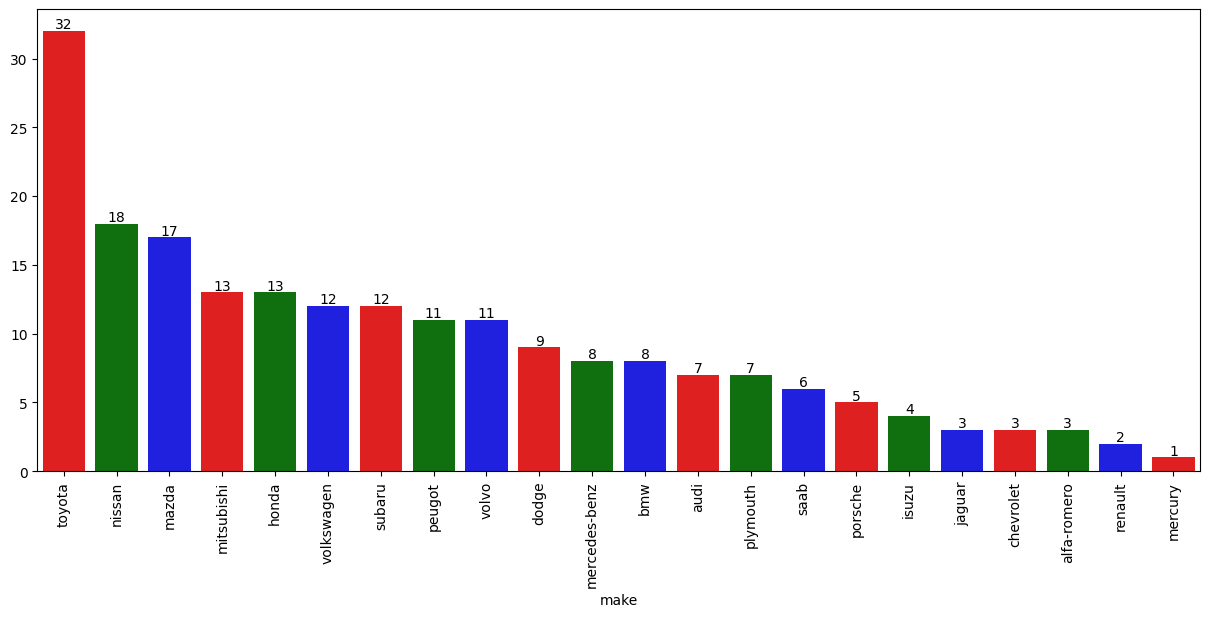

In [70]:
plt.figure(figsize=(15, 6))
c = df['make'].value_counts()
# Create the bar plot
ax = sns.barplot(x=c.index, y=c.values,palette = list('rgb'))

# Annotate each bar with its count value
for i, count in enumerate(c.values):
    ax.text(x=i, y=count +0.2 , s=count, ha='center')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()


e. Based on new regulations, companies decided to change the prices of the car. The 
new update price is calculated as - if the engine is in front, price will be same else if 
the engine is in rear, price will be doubled. Add a new column with the updated prices. 

             *******************conclusion*****************************

    - we have see the data. And the condition is 'engine-Location' is rear then price is doublled.so only three row getting these engine 
      location is 'rear'

    - according to question i have  asign price value is doublled 

In [71]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [72]:
df.loc[(df['engine-location'] == 'rear'),'price'] 

126    32528.0
127    34028.0
128    37028.0
Name: price, dtype: float64

In [73]:
def price_data(row):
    if row['engine-location'] == 'rear':
        return row['price'] * 2
    else:
        return row['price']

df['price_new'] = df.apply(price_data, axis=1)


In [74]:
df[df['engine-location'] == 'rear']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_new
126,3,245.748829,porsche,gas,std,2.0,hardtop,rwd,rear,89.5,...,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,32528.0,65056.0
127,3,280.178108,porsche,gas,std,2.0,hardtop,rwd,rear,89.5,...,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,34028.0,68056.0
128,3,289.287838,porsche,gas,std,2.0,convertible,rwd,rear,89.5,...,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,37028.0,74056.0



Sort the dataframe according to car and price combined.  

In [75]:
df.sort_values(by  = ['make','price'],ascending = False)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_new
204,-1,95.0000,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0,22625.0
203,-1,95.0000,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,22470.0
202,-1,95.0000,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,21485.0
201,-1,95.0000,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,19045.0
199,-1,74.0000,volvo,gas,turbo,4.0,wagon,rwd,front,104.3,...,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18950.0,18950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2,164.0000,audi,gas,std,4.0,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,13950.0
9,0,175.8973,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,10295.0,10295.0
1,3,132.0000,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,16500.0
2,1,132.0000,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,16500.0


Create a new column which stores the number of doors in a car as string. 

In [76]:
def door(data):
    if data == 2.0: 
        return 'two'
    elif data == 4.0: 
        return 'four'
    else:
        return 'other'  # Assuming you want to handle other cases as well

df['doors'] = df['num-of-doors'].apply(door)


In [77]:
df[['doors']].head()

,doors
0,two
1,two
2,two
3,four
4,four


In [78]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_new,doors
0,3,132.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,13495.0,two
1,3,132.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,16500.0,two
2,1,132.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,16500.0,two
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,13950.0,four
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,17450.0,four
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,16845.0,four
201,-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,19045.0,four
202,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,21485.0,four
203,-1,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,22470.0,four


Calculate which variable/feature/attribute is impacting the price of the car the most.
    
        *******************conclusion*****************************
        - The most Impacted Variable is 'Engine Size'.Because if  Engine size Increase and Price increase else Price Dicrease
        - Engine Size and Price is highly relaction each other

In [79]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only = True)
abs_corr_values = correlation_matrix['price'].drop(['price','price_new']).sort_values(ascending=False)
print(f"The variable impacting the price of the car the most is '{abs_corr_values.index[0]}' with a correlation coefficient of {abs_corr_values.values[0]:.2f}")


The variable impacting the price of the car the most is 'engine-size' with a correlation coefficient of 0.86



Concatenate the two data frames given below firstly row wise and secondly column 
wise.

In [80]:
GermanCars = {'Company': ['Ford', 'Mercedes', 'BMV', 'Audi'],  
'Price': [23845, 171995, 135925, 71400]} 
japaneseCars = {'Company': ['Toyota', 'Honda', 'Nissan', 'Mitsubishi '],  
'Price': [29995, 23600, 61500, 58900]} 
GermanCars = pd.DataFrame(GermanCars)
japaneseCars = pd.DataFrame(japaneseCars)
# columns wise
df_con = pd.concat([GermanCars,japaneseCars],ignore_index = True)
# row wise 
df_concat_column = pd.concat([GermanCars,japaneseCars], axis=1)

Save the first and last 15 records of the DataFrame in a separate excel sheet. 

In [81]:
top_15 = df.head(15)
file_path = 'top_15_rows.xlsx'
top_15.to_excel(file_path, index=False)

In [82]:
last_15 = df.tail(15)
file_path = 'last_15_rows.xlsx'
last_15.to_excel(file_path, index=False)

In [83]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'price_new', 'doors'],
      dtype='object')

# Average price According to company name body style
    *******************conclusion*****************************
        - jaguar is the one and only company they are manufacture (wogan body style car) 
        - jaguar wogan is average price '34600' and this is highest averge in this dataset 
          (this price highest not only wogan body style this on all body style)
        - marcedez-bezz is second highest average price (this all body style and all hatchback body style)
        - porsche is fourth highest average price (this all body style and fisrt highest avgerage price all sedan body style)
        - BMW is third highest average price (this all body style and second highest avgerage price all hatchback body style)
        - there are only 5  company is manufacture hatchback body style(BMW,marcedez-bezz,subaru,toyota,Valvo)
        -  only these two company alfa romero and audi  is manufacture convetible body style
        - but comman is that in this dataset sedan is most commonly manufacture body style,
          almost all company are manufacture  sedan body style 
        - second most comman manufacture body style is hatchback 

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

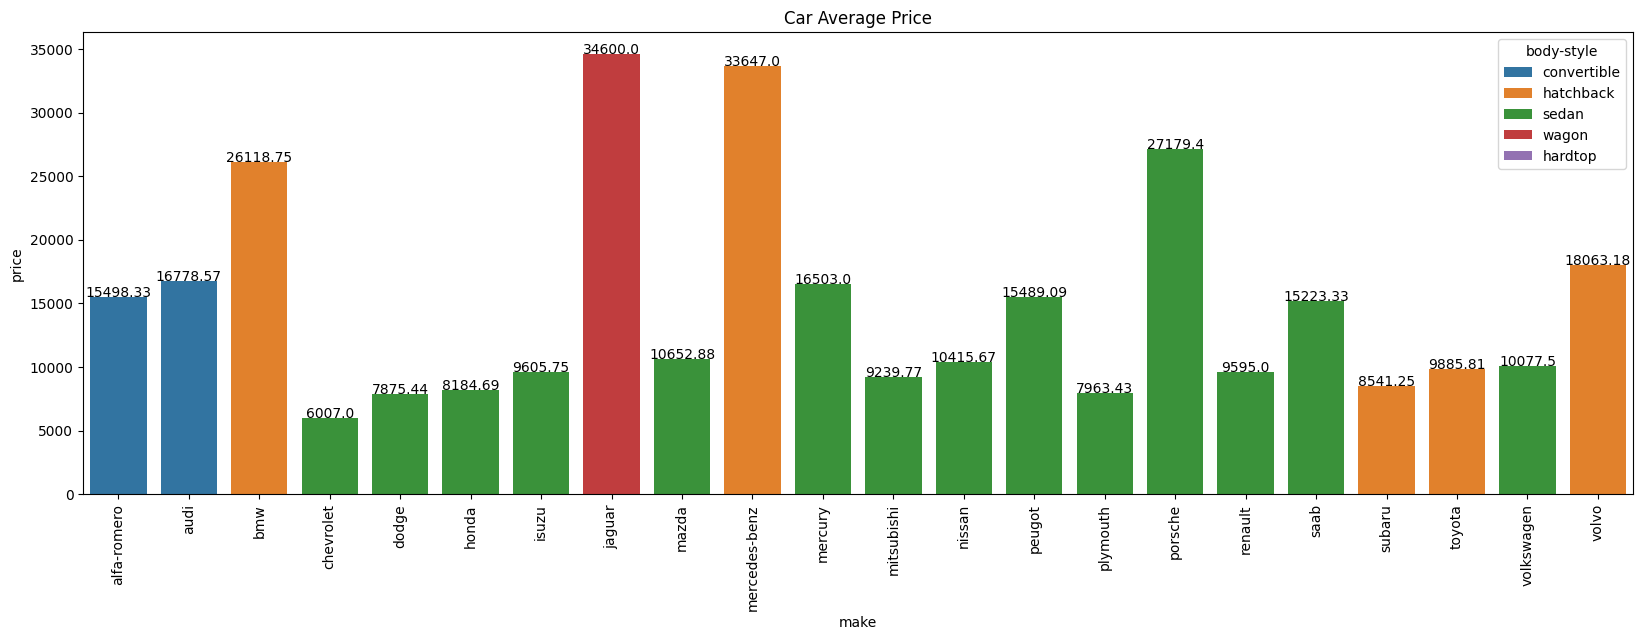

In [84]:
d_max = df.groupby(['make'])['price'].mean().reset_index()
plt.figure(figsize = (20,6))
ax = sns.barplot(x = d_max['make'],y = d_max['price'],hue = df['body-style'])
for i, count in enumerate(d_max['price']):
    ax.text(x=i, y=count +0.2 , s=round(count,2), ha='center')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Car Average Price')
plt.show()

In [85]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_new,doors
0,3,132.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,13495.0,two
1,3,132.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,16500.0,two
2,1,132.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,16500.0,two
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,13950.0,four
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,17450.0,four


# Tell Me,What the 50%tile car sold price

   *******************conclusion*****************************
       
    - According to this data.mainly 50% car sold in this price (jaguar,mercedes-bezz) is most highest medain selling price3

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

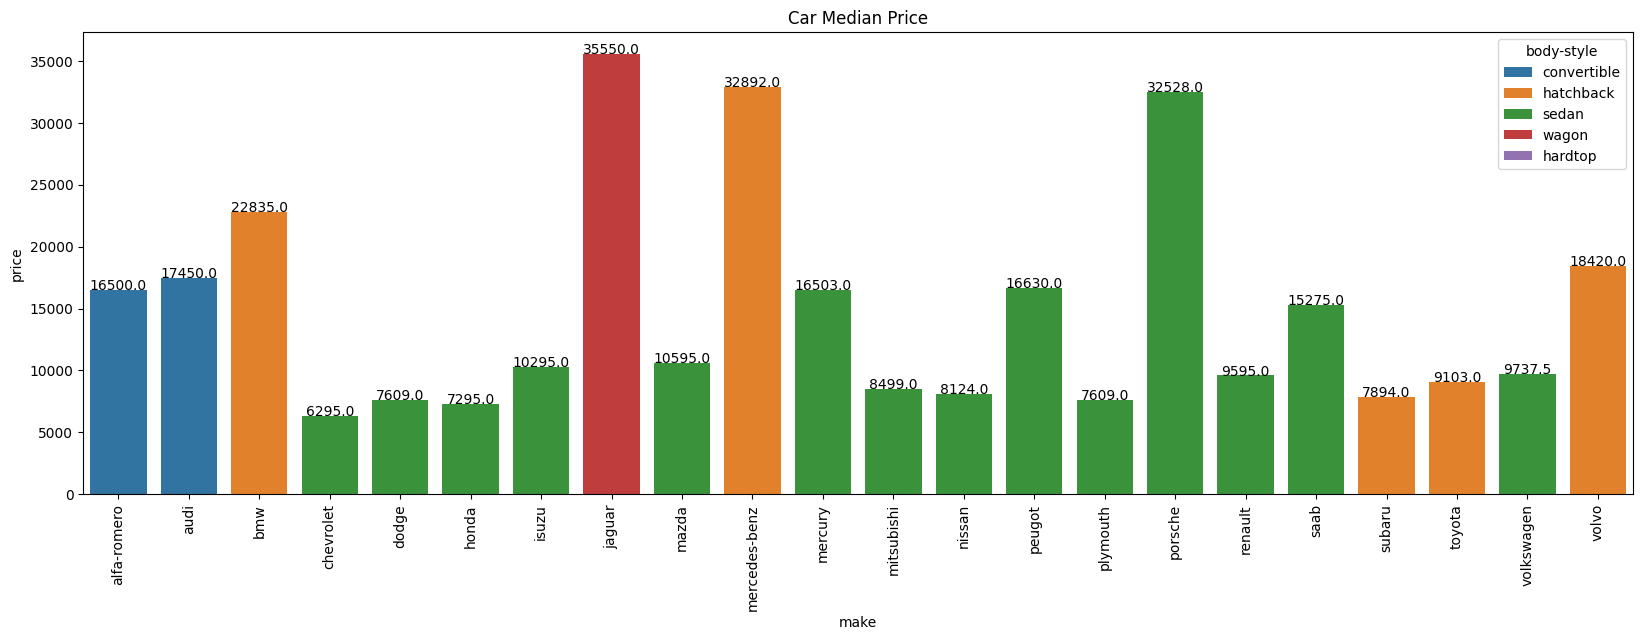

In [86]:
d_max = df.groupby(['make'])['price'].median().reset_index()
plt.figure(figsize = (20,6))
ax = sns.barplot(x = d_max['make'],y = d_max['price'],hue = df['body-style'])
for i, count in enumerate(d_max['price']):
    ax.text(x=i, y=count +1 , s=round(count,2), ha='center')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Car Median Price')
plt.show()

conclusion**********
    
    - Sedan body style is the top selling body style 
    - And Second hatchback second largest  top selling body style

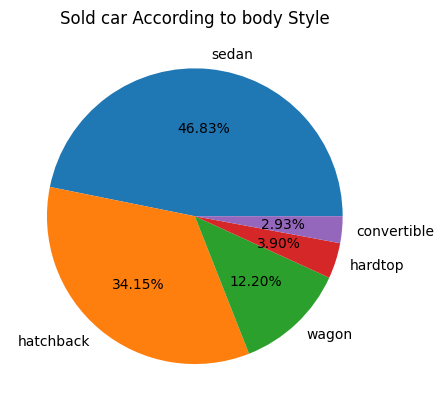

In [87]:
d = df['body-style'].value_counts()
plt.pie(d,labels = d.index,autopct='%.2f%%')
plt.title('Sold car According to body Style')
plt.show()

# 

    - There are only two fuel fuel cars are avaible. most and commanly selling fuel type is Gas 48.29% car market are exit in gas fuel
    - And other hand The most commanly selling vehicle are number of 4 doors. around 48.29% car market
    

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


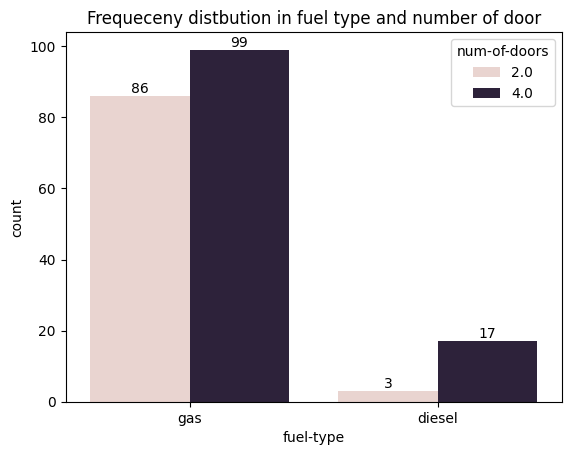

In [88]:

ax = sns.countplot(x = df['fuel-type'],hue = df['num-of-doors'])
for i in range(df['num-of-doors'].nunique()):
    ax.bar_label(ax.containers[i])
plt.title('Frequeceny distbution in fuel type and number of door')
plt.show()

# why are highest sell of gas fuel are 

        *********************conclusion************************
            - Price is major factor in selling of gas fuel car. because gas cars average price 
              is 3 to 2 lac less price in as compore to diesel car
            - And Second i think gas price is cheap as compare to diesel price 
            - Accoding to some.diesel car engine id toque is high.so the please creat
                diesel cars are generate low as compare to gas fuel car.And other hand 
                gas cars are genrate most effect horsepower.that is reason racing car engine is use gas fuel

Text(0.5, 1.0, 'Average Mileage in horsepower based on Fuel Type')

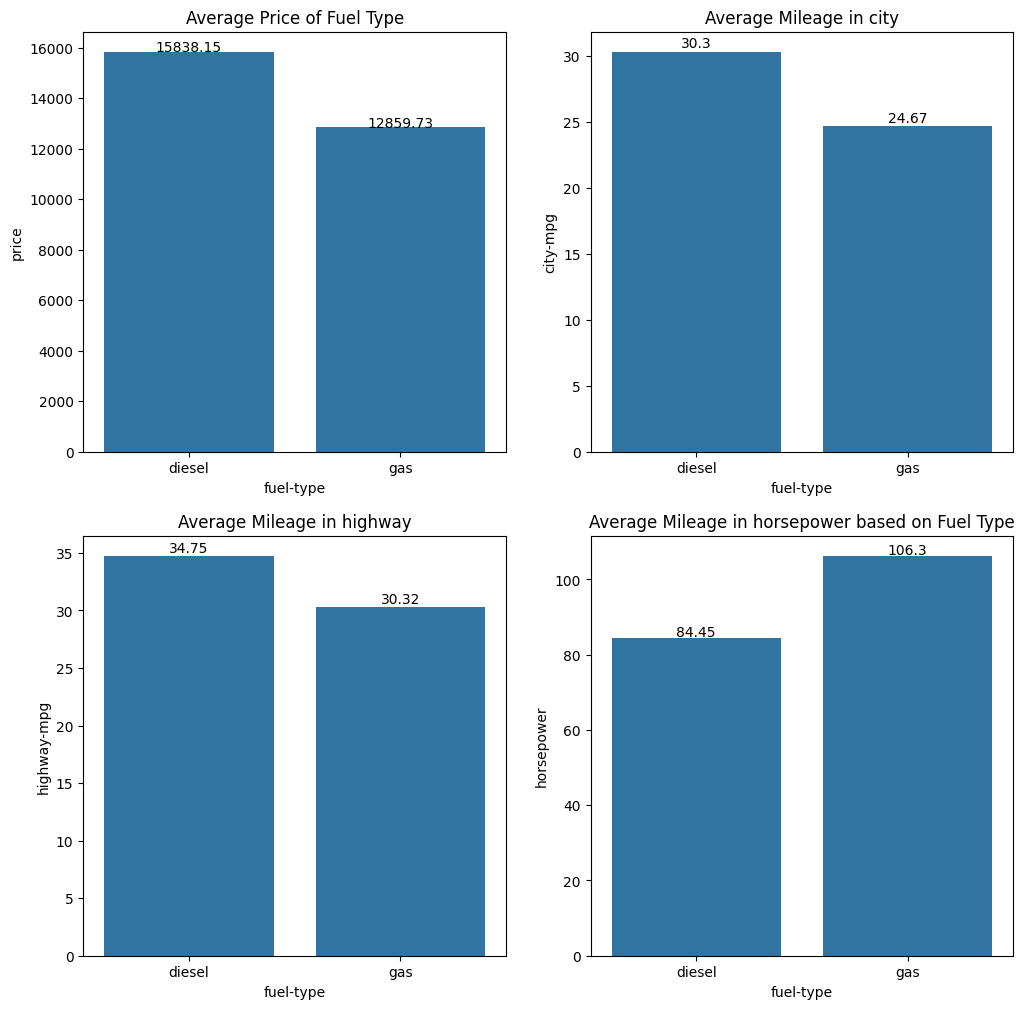

In [89]:
d = df.groupby('fuel-type')['price'].mean().reset_index()
d_c = df.groupby('fuel-type')['city-mpg'].mean().reset_index()
d_h = df.groupby('fuel-type')['highway-mpg'].mean().reset_index()
d_hp = df.groupby('fuel-type')['horsepower'].mean().reset_index()
plt.figure(figsize  = (12,12))
plt.subplot(2,2,1)
ax = sns.barplot(y = d['price'],x= d['fuel-type'])
for i,count in enumerate(d['price']):
    ax.text(x=i, y=count +1 , s=round(count,2), ha='center')
plt.title('Average Price of Fuel Type')
plt.subplot(2,2,2)
ax = sns.barplot(y = d_c['city-mpg'],x= d_c['fuel-type'])
for i,count in enumerate(d_c['city-mpg']):
    ax.text(x=i, y=count +0.3 , s=round(count,2), ha='center')
plt.title('Average Mileage in city')
plt.subplot(2,2,3)
ax = sns.barplot(y = d_h['highway-mpg'],x= d_h['fuel-type'])
for i,count in enumerate(d_h['highway-mpg']):
    ax.text(x=i, y=count +0.3 , s=round(count,2), ha='center')
plt.title('Average Mileage in highway')
plt.subplot(2,2,4)
ax = sns.barplot(y = d_hp['horsepower'],x= d_hp['fuel-type'])
for i,count in enumerate(d_hp['horsepower']):
    ax.text(x=i, y=count +0.3 , s=round(count,2), ha='center')
plt.title('Average Mileage in horsepower based on Fuel Type')

In [90]:
d_c = df.groupby('fuel-type')['horsepower'].mean()
# d_h = df.groupby('fuel-type')['highway-mpg'].mean().reset_index()

In [91]:
df['engine-size'].mean()

126.90731707317073

In [92]:
d_c

fuel-type
diesel     84.450000
gas       106.297297
Name: horsepower, dtype: float64

In [93]:
df['engine-size'].max()

326

In [110]:
import plotly as px

In [105]:
dir (px)

['__version__',
 'colors',
 'data',
 'graph_objects',
 'graph_objs',
 'io',
 'offline',
 'tools',
 'utils']

In [100]:
dir(px)

['__version__',
 'colors',
 'data',
 'graph_objects',
 'graph_objs',
 'io',
 'offline',
 'tools',
 'utils']